# OpenCV operations on an image with a crack on the road

This image is taken from a dataset of images with cracks on the road and various standard OpenCV operations are carried out on the same. A practical use case for this task includes the pre-processing of an image to make the relevant features more prominent, eliminate noise and make the image a better input for more accurate and efficient subsequent classification using CNNs.

By: Yash Garg, 2022A3PS1470H

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread("Crack.jpg")

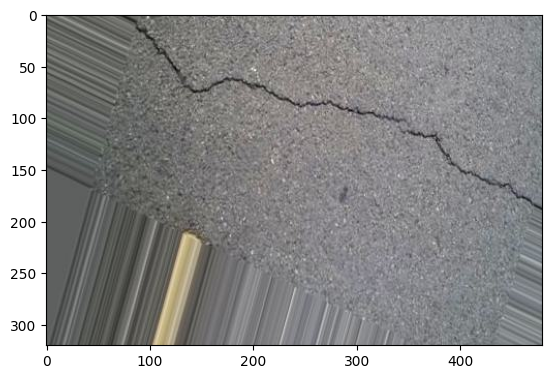

In [3]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB), cmap = 'gray')

# ARITHMETIC OPERATIONS


# Addition

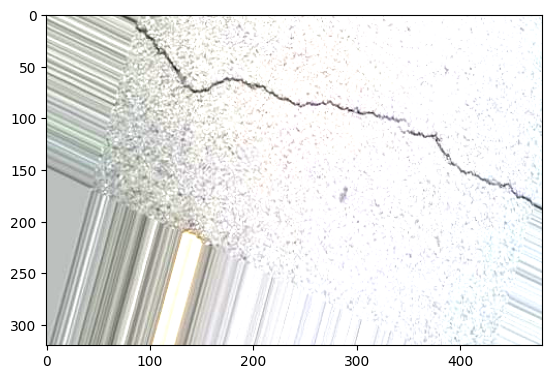

In [4]:
addn = cv2.add(img1, img1)

plt.imshow(cv2.cvtColor(addn, cv2.COLOR_BGR2RGB), cmap = 'gray')

#Not a good idea as most pixels become white (eg 200 + 215 = 255 as only 8 bits are permitted)

# Subtraction

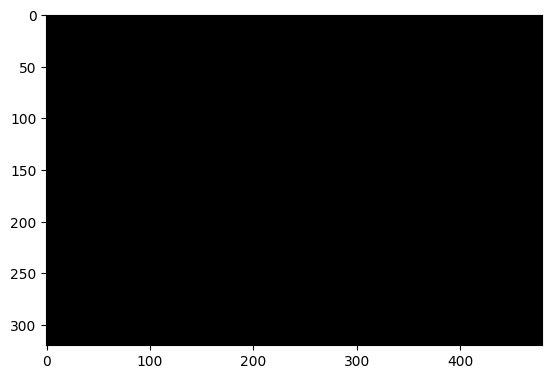

In [5]:
sub1 = cv2.subtract(img1, img1)
plt.imshow(cv2.cvtColor(sub1, cv2.COLOR_BGR2RGB), cmap = 'gray')

# BITWISE OPERATORS

In [6]:
bw1 = cv2.imread("Crack.jpg", 0)
bw2 = np.zeros([320, 480], dtype = np.uint8)
bw2 = bw2 + 100

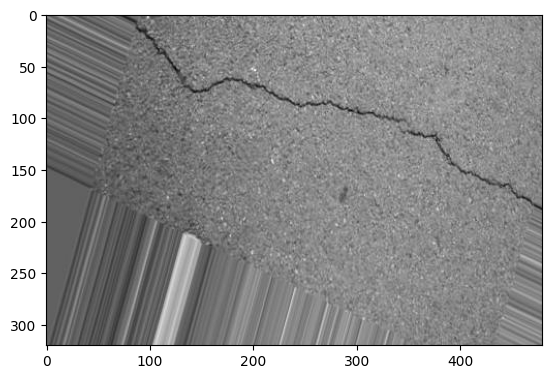

In [7]:
plt.imshow(bw1, cmap = 'gray')

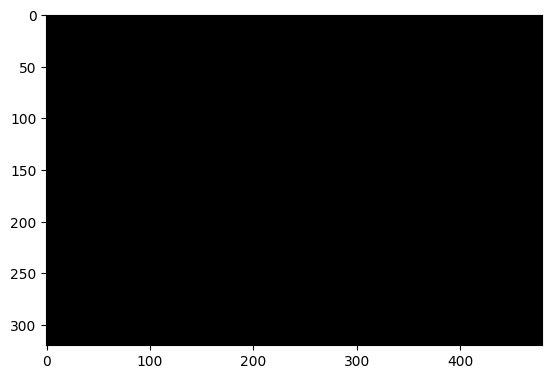

In [8]:
plt.imshow(bw2, cmap = 'gray')

## AND

and_img = bw1 & bw2

plt.imshow(and_img, cmap='gray')

# 0 & X = 0, 1 & 1 = 1

## OR

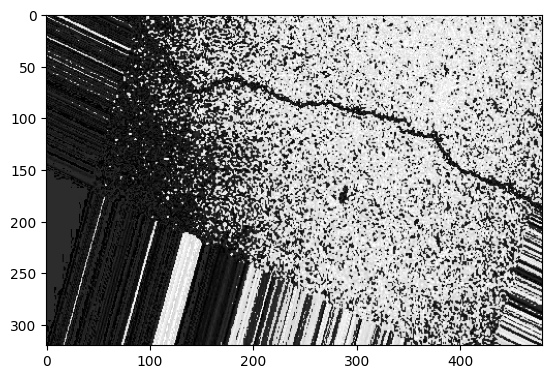

In [9]:
or_img = bw1 | bw2

plt.imshow(or_img, cmap='gray')

# 1 | X = 1, 0 | 0 = 0

## NOT

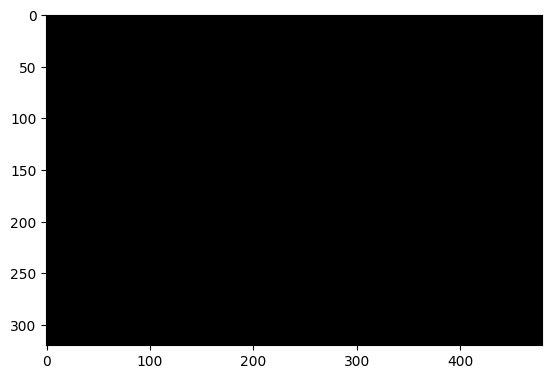

In [10]:
not_img = ~(bw2)

plt.imshow(not_img, cmap='gray')

# ~1 = 0, ~0 = 1

## XOR

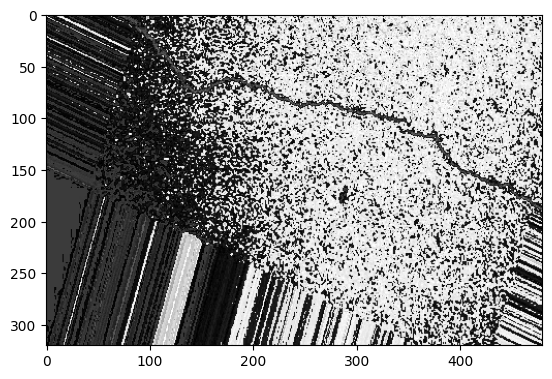

In [11]:
xor_img = bw1 ^ bw2

plt.imshow(xor_img, cmap='gray')

# X ^ X = 0, X ^ 0 = X, X ^ 1 = X'

## XNOR (complement of XOR)

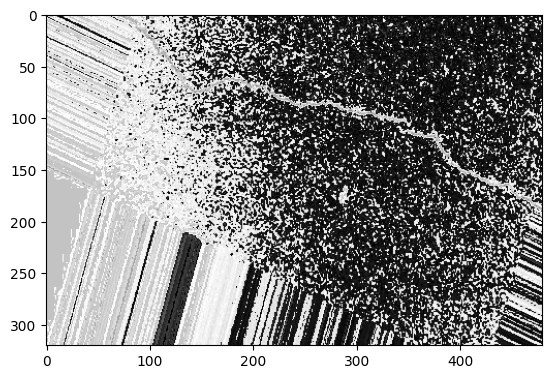

In [12]:
xnor_img = bw1 ^ ~(bw2)

plt.imshow(xnor_img, cmap='gray')

# X @ X = 1, X @ 0 = X', X @ 1 = X

# EDGE DETECTORS

In [13]:
img = cv2.imread('Crack.jpg')

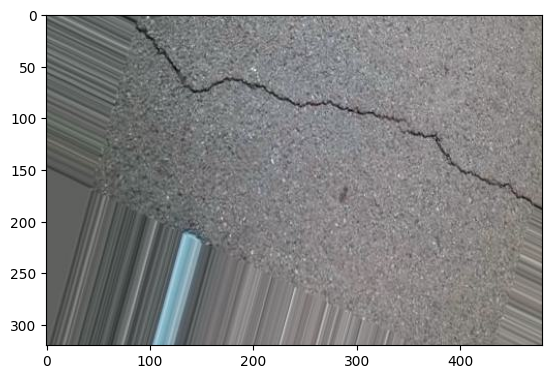

In [14]:
plt.imshow(img, cmap = 'gray')

# Robert Cross Edge Detector

Gx = [[1, 0], [0, -1]]

Gy = [[0, 1], [-1, 0]]

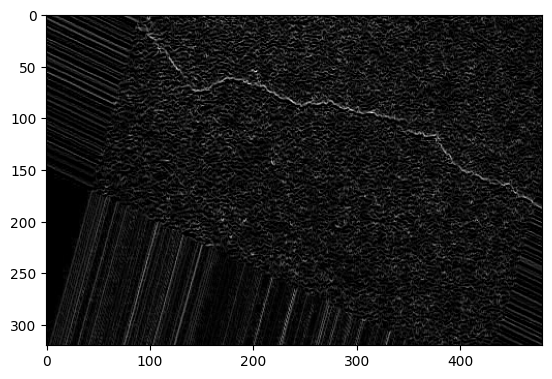

In [15]:
# Read the image
image = cv2.imread('Crack.jpg', cv2.IMREAD_GRAYSCALE)

# Define the Robert's Cross operator kernels
kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

# Apply convolution using filter2D
grad_x = cv2.filter2D(image, -1, kernel_x)
grad_y = cv2.filter2D(image, -1, kernel_y)

# Compute the gradient magnitude
gradient_magnitude = cv2.sqrt(grad_x.astype(np.float32)**2 + grad_y.astype(np.float32)**2)

# Normalize to 0-255
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8
gradient_magnitude = np.uint8(gradient_magnitude)

# Show the results
plt.imshow(gradient_magnitude, cmap='gray')


# Sobel Edge Detector

Gx = [[-1 0 1][-2 0 2][-1 0 1]] 

Gy  = [[-1 -2 -1][0 0 0][1 2 1]]

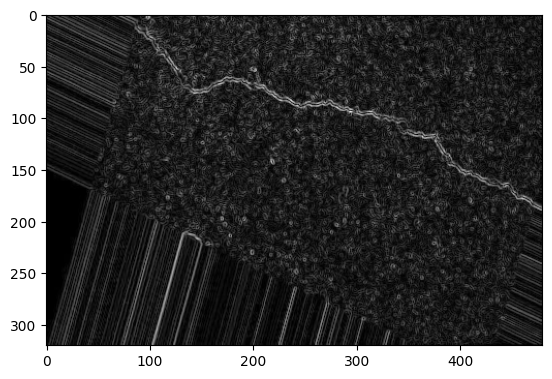

In [16]:
# Read the image
image = cv2.imread('Crack.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel operator in X and Y direction
grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # X direction
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Y direction

# Compute the gradient magnitude
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Normalize to 0-255
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8
gradient_magnitude = np.uint8(gradient_magnitude)

# Show the results

plt.imshow(gradient_magnitude, cmap = 'gray')



# Canny Edge Detector

Steps:

- Smoothen image
- Find Gx and Gy using Sobel gradient matrices
- Suppress non maximum values

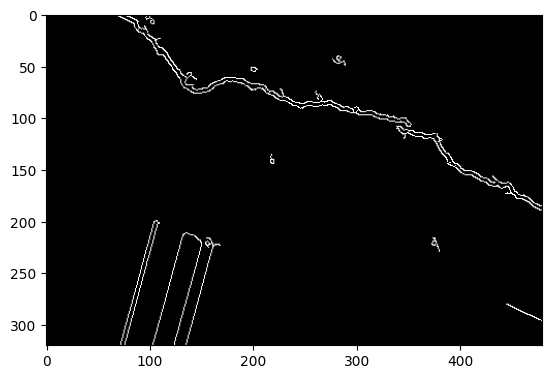

In [17]:
# Read the image
image = cv2.imread('Crack.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Apply Canny edge detection
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

# Show the results
plt.imshow(edges, cmap='gray')

# THRESHOLDING IMAGES

## Simple Threshoding

Threshold based on a single value.

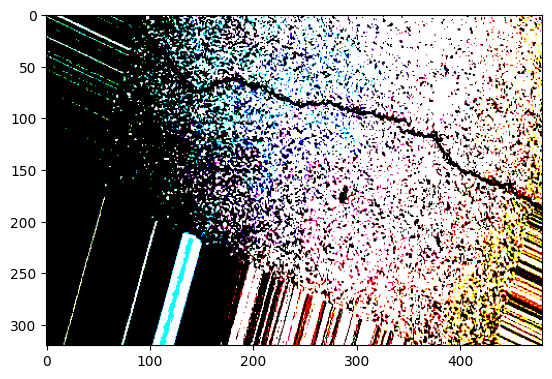

In [18]:
image = cv2.imread('Crack.jpg')

# Simple Thresholding
_, simple_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(simple_thresh)

## Adaptive Thresholding

Thresholding based on a window/neighborhood.

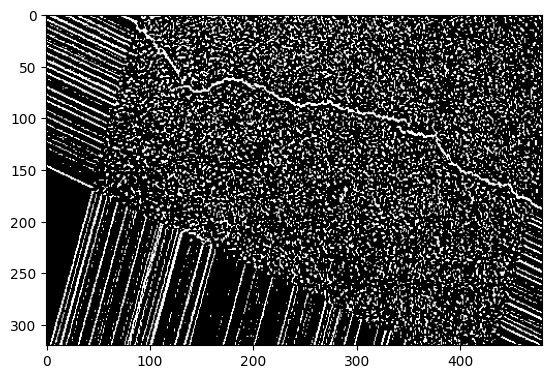

In [19]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 9)
plt.imshow(adaptive_thresh, cmap='gray')

## Otsu Thresholding

Maximises class variance between different pixel categories and gives optimum threshold.

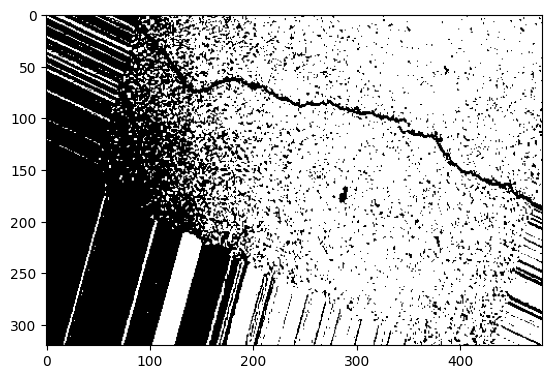

In [20]:
_, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(otsu_thresh, cmap="gray")

# HISTOGRAM EQUALIZATION

- Goal is to improve contrast by:
    - Flattening the histogram profile
    - In other words, linearise the CDF (Cumulative distribution function)

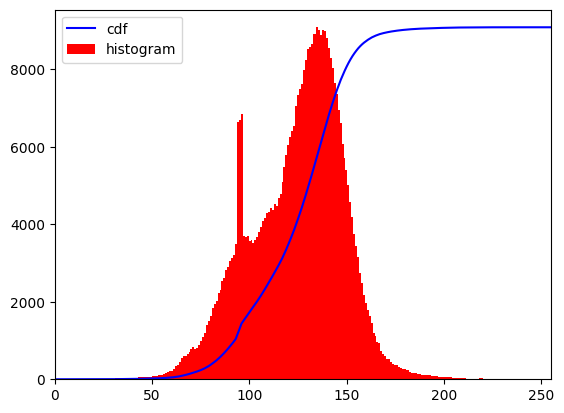

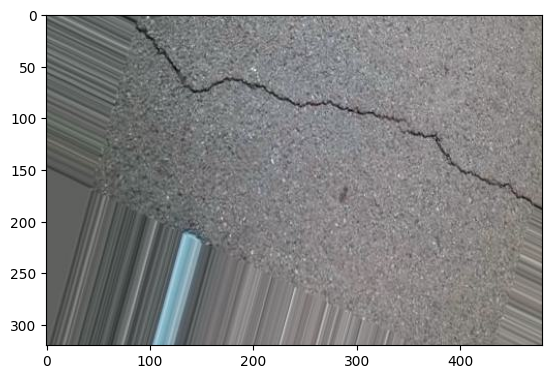

In [21]:
hist,bins = np.histogram(image.flatten(),256,[0,255])

#Cumulative Distribution Function (CDF)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')

#Frequency Function (PDF)
plt.hist(image.flatten(),256,[0,255], color = 'r')
plt.xlim([0,255])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
plt.imshow(image)

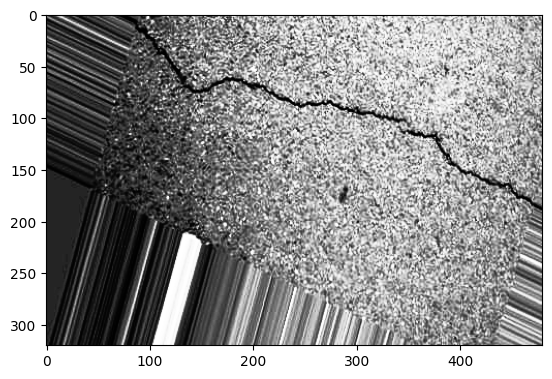

In [22]:
temp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized_img = cv2.equalizeHist(temp)
plt.imshow(equalized_img, cmap = 'gray')

# Equalized histogram

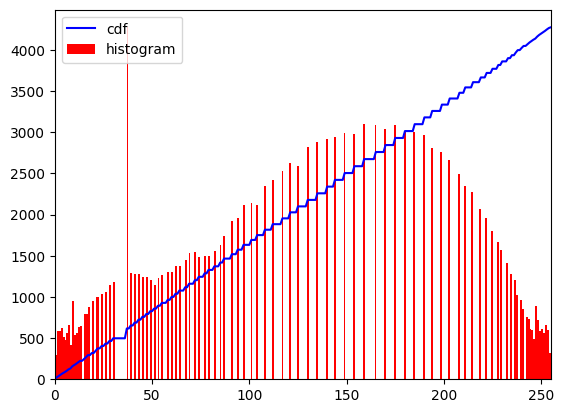

In [23]:
hist,bins = np.histogram(equalized_img.flatten(),256,[0,255])

#Cumulative Distribution Function (CDF)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')

#Frequency Function (PDF)
plt.hist(equalized_img.flatten(),256,[0,255], color = 'r')
plt.xlim([0,255])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# MORPHOLOGICAL OPERATIONS

## Original image

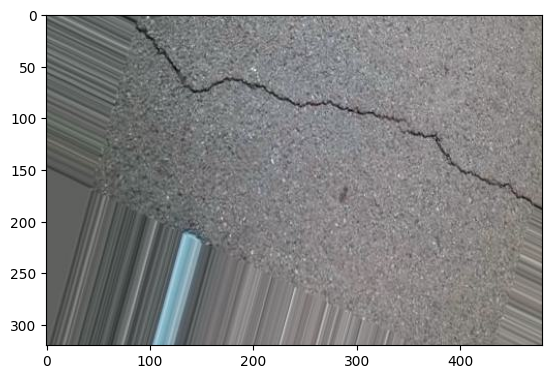

In [24]:
plt.imshow(image)

# Erosion

There will be a structure element (SE) which acts as a convolution matrix on every pixel of the image, 
and 
if the SE matches with the window at that instance: it retains the foreground pixel,
else: it converts it to a background pixel.

Represented by: **X - B**

where

X = image

B = Structure Element (Kernel)

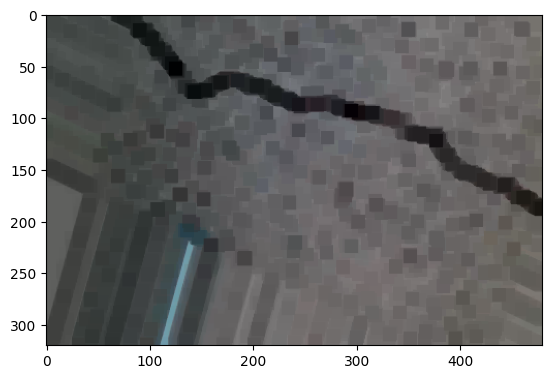

In [25]:
# define the kernel 
B_erosion = np.ones((5,5), np.uint8) #Structure Element 5x5
  
# erode the image 
erosion = cv2.erode(image, B_erosion, 
                    iterations=3) 
  
# print the output 
plt.imshow(erosion, cmap='gray') 

# Dilation

If the seat point of SE is a foreground pixel and the window pixel of the image is a foreground pixel, the entire space occupied by the SE in the image becomes a foreground pixel.

It is represented by: **X + B**

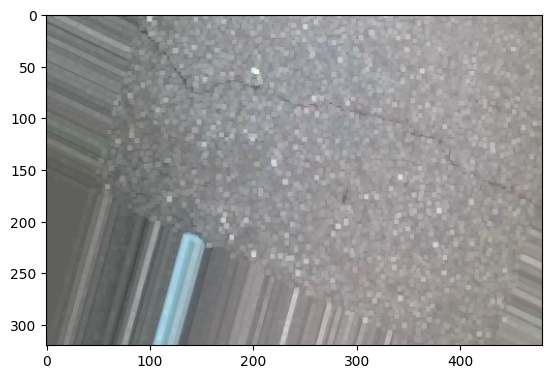

In [26]:
B_dilation = np.ones((2, 2), np.uint8) 

dilation = cv2.dilate(image, B_dilation, 
                    iterations=3) 

plt.imshow(dilation, cmap='gray') 

# Opening (OED)

- **(X - B) + B**
- Used to remove stray foreground pixels from background
- Clears out noise and small objects

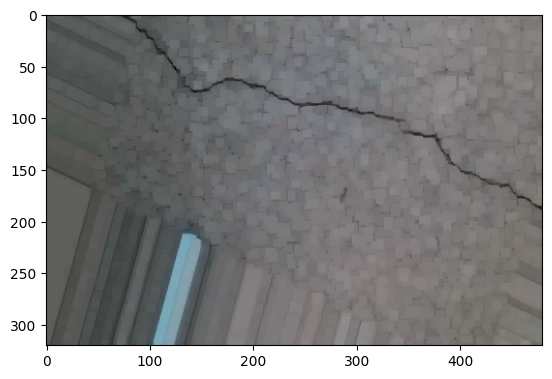

In [27]:
kernel = np.ones((7, 7), np.uint8) 
  
 
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, 
                           kernel, iterations=1)  
plt.imshow(opening, cmap='gray') 

# Closing (CDE)

- **(X + B) - B**
- Used to remove background holes in foreground object
- Fills out gaps and holes

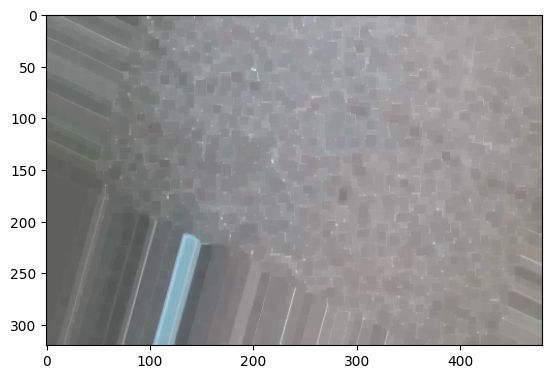

In [28]:
kernel = np.ones((3, 3), np.uint8) 
  
# opening the image 
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=3) 
  
# print the output 
plt.imshow(closing, cmap='gray')

# Gradient (Dilation - Erosion)

- **(X + B) - (X-B)**
- Used to form an outline of the target foreground object

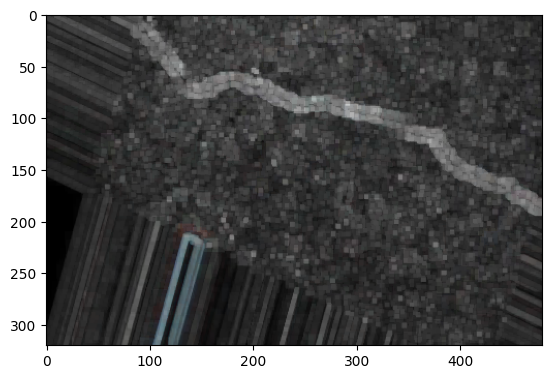

In [29]:
plt.imshow(dilation - erosion, cmap='gray')

# SMOOTHENING & DENOISING IMAGES

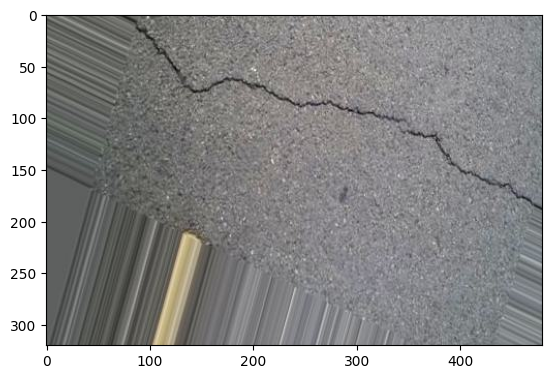

In [30]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')

# Blurring Images


# Gaussian Blurring

GB = Σ[Gs(p, q) * Iq] => Space function

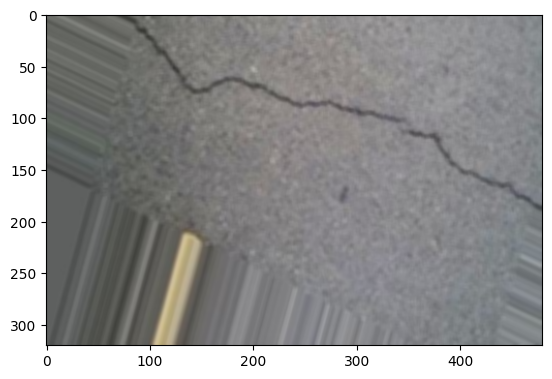

In [31]:
gb_img = cv2.GaussianBlur(image,(5,5),cv2.BORDER_DEFAULT)

plt.imshow(cv2.cvtColor(gb_img, cv2.COLOR_BGR2RGB), cmap='gray')

# Bilateral Filtering

BF = (1/N)*  Σ [Gs(p, q) * Gr(Ip, Iq) * Iq ] => Space function & Range function

d = neighborhood between p and q

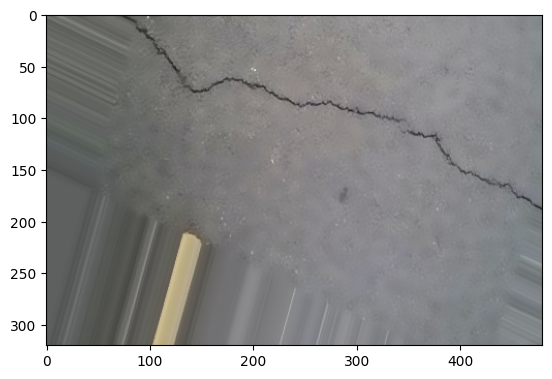

In [32]:
 # Apply bilateral filter with d = 15,  
# sigmaColor (Gr) = sigmaSpace (Gs) = 75. 
bilateral = cv2.bilateralFilter(image, 15, 75, 75) 
  
plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB), cmap='gray')

# LINE DETECTION USING HOUGHLINE METHOD

We use it find optimal (r, ϴ) for the equation:

 - **r = x cosϴ + y sinϴ**
 
 Standard Hough Transform: HoughLineStandard() => **(r, ϴ)**
 
 Probabilistic Hough Transform: HoughLinesP() => **(x1, y1)** and **(x2, y2)**

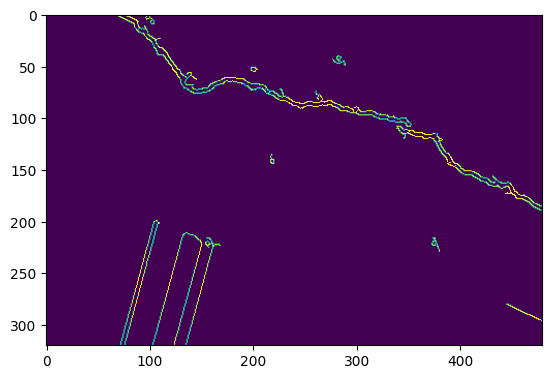

In [33]:
# Read the image
image = cv2.imread('Crack.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Apply Canny edge detection
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

# Apply Hough Line Transform
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=150)

# Draw the detected lines
if lines is not None:
    for rho, theta in lines[:, 0]:  # Extract rho and theta
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # Convert polar coordinates to two points
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Show the result
plt.imshow(edges)


# CIRCLE DETECTION USING HOUGH GRADIENT METHOD

- Analogous to Hough Line Method
- Instead of finding (r, ϴ), we find (a, b, r)

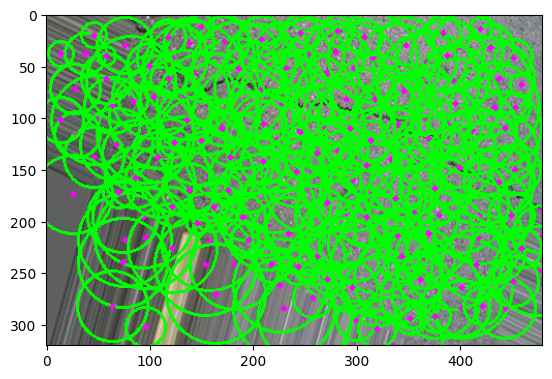

In [34]:
img = cv2.imread('Crack.jpg', cv2.IMREAD_COLOR) 

# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 
  
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, 
               param2 = 30, minRadius = 5, maxRadius = 50) 
  

if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Circumference. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
  
        # Centre. 
        cv2.circle(img, (a, b), 1, (255, 0, 255), 3) 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')

# CORNER DETECTION

We have:

M = w(x, y) * [[Ix^2   IxIy] [IxIy    Iy^2]]

where w(x, y) = window function
    Ix = Sobel gradient in X direction
    Iy = Sobel gradient in y direction
    
    d1 and d2 will be eigen values of M.
    
    
Using these values R score is calculated and if it is greater than a given threshold, corners are detected.

# Harris corner detection

R = | M | - k[trace(M)]^2

where k => 0.02 to 0.06

| M | = d1 * d2

trace(M) = d1 + d2

In [35]:
def harris_corners(img_path, k = 0.04, quality_factor=0.001):
    
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    #Conversion to float is a prerequisite for the algorithm
    gray_img = np.float32(gray_img)
    
    # 3 is the size of the kernel considered, aperture parameter = 3: used to calculate Sobel Gradient
    
    corners_img = cv2.cornerHarris(gray_img,3,3,k)
    
    #Marking the corners in Green
    image[corners_img > quality_factor*corners_img.max()] = [255,0,255]

    return image

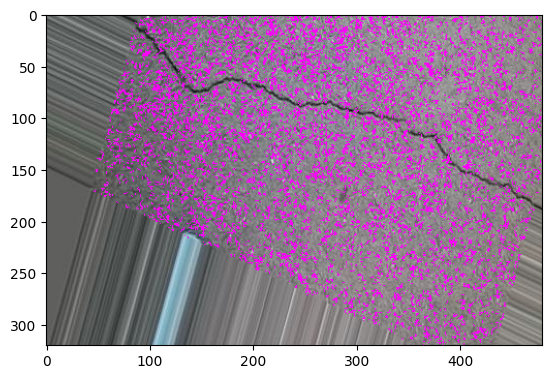

In [36]:
harris_img = harris_corners('Crack.jpg', k = 0.2)
plt.imshow(harris_img)

# Shi-Tomasi Detector

**R = min( d1, d2 )**

In [37]:
def shi_tomasi(img_path):
    
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    #Converting to grayscale
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    #1000 = max number of corners
    # 0.01 = minimum quality level below which the corners are rejected
    # 10 = minimum euclidean distance between two corners
    corners_img = cv2.goodFeaturesToTrack(gray_img,1000,0.01,10)
    
    corners_img = np.int0(corners_img)

    for corners in corners_img:
       
        x,y = corners.ravel()
        #Circling the corners in green
        cv2.circle(image,(x,y),3,[0,255,0],-1)

    return image

C:\Users\Yash Garg\AppData\Local\Temp\ipykernel_18100\1914225762.py:12: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners_img = np.int0(corners_img)


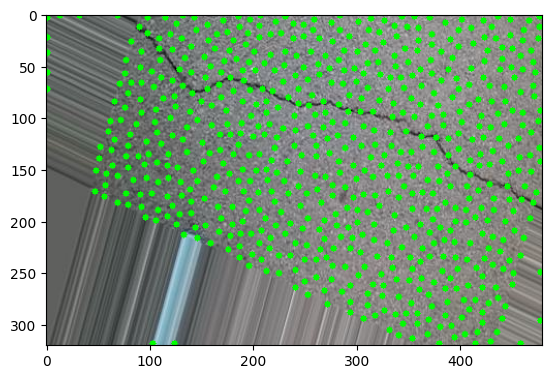

In [38]:
shi_tomasi_img = shi_tomasi('Crack.jpg')
plt.imshow(shi_tomasi_img)